## About Dataset

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.



### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



1.Pregnancies: Number of times pregnant

2.Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3.BloodPressure: Diastolic blood pressure (mm Hg)

4.SkinThickness: Triceps skin fold thickness (mm)

5.Insulin: 2-Hour serum insulin (mu U/ml)

6.BMI: Body mass index (weight in kg/(height in m)^2)

7.DiabetesPedigreeFunction: Diabetes pedigree function

8.Age: Age (years)

9.Outcome: Class variable (0 or 1)


Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is no categorical data

## Check null values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see the min values for Glucose,Blood Pressure,Insulin,Skin Thickness,BMI are zero , which is not correct as no one has blood pressure of zero.



This indicates there is missing value in the form of zero. 

We have to handle this values.

We can use mean or median for filling zero values.

As there is no significant difference between mean and median we can use mean as filling values

In [7]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handle Duplicates

In [9]:
duplicate_rows_data=df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows_data.shape)

Number of duplicate rows:  (0, 9)


No duplicate present 

## Visualization

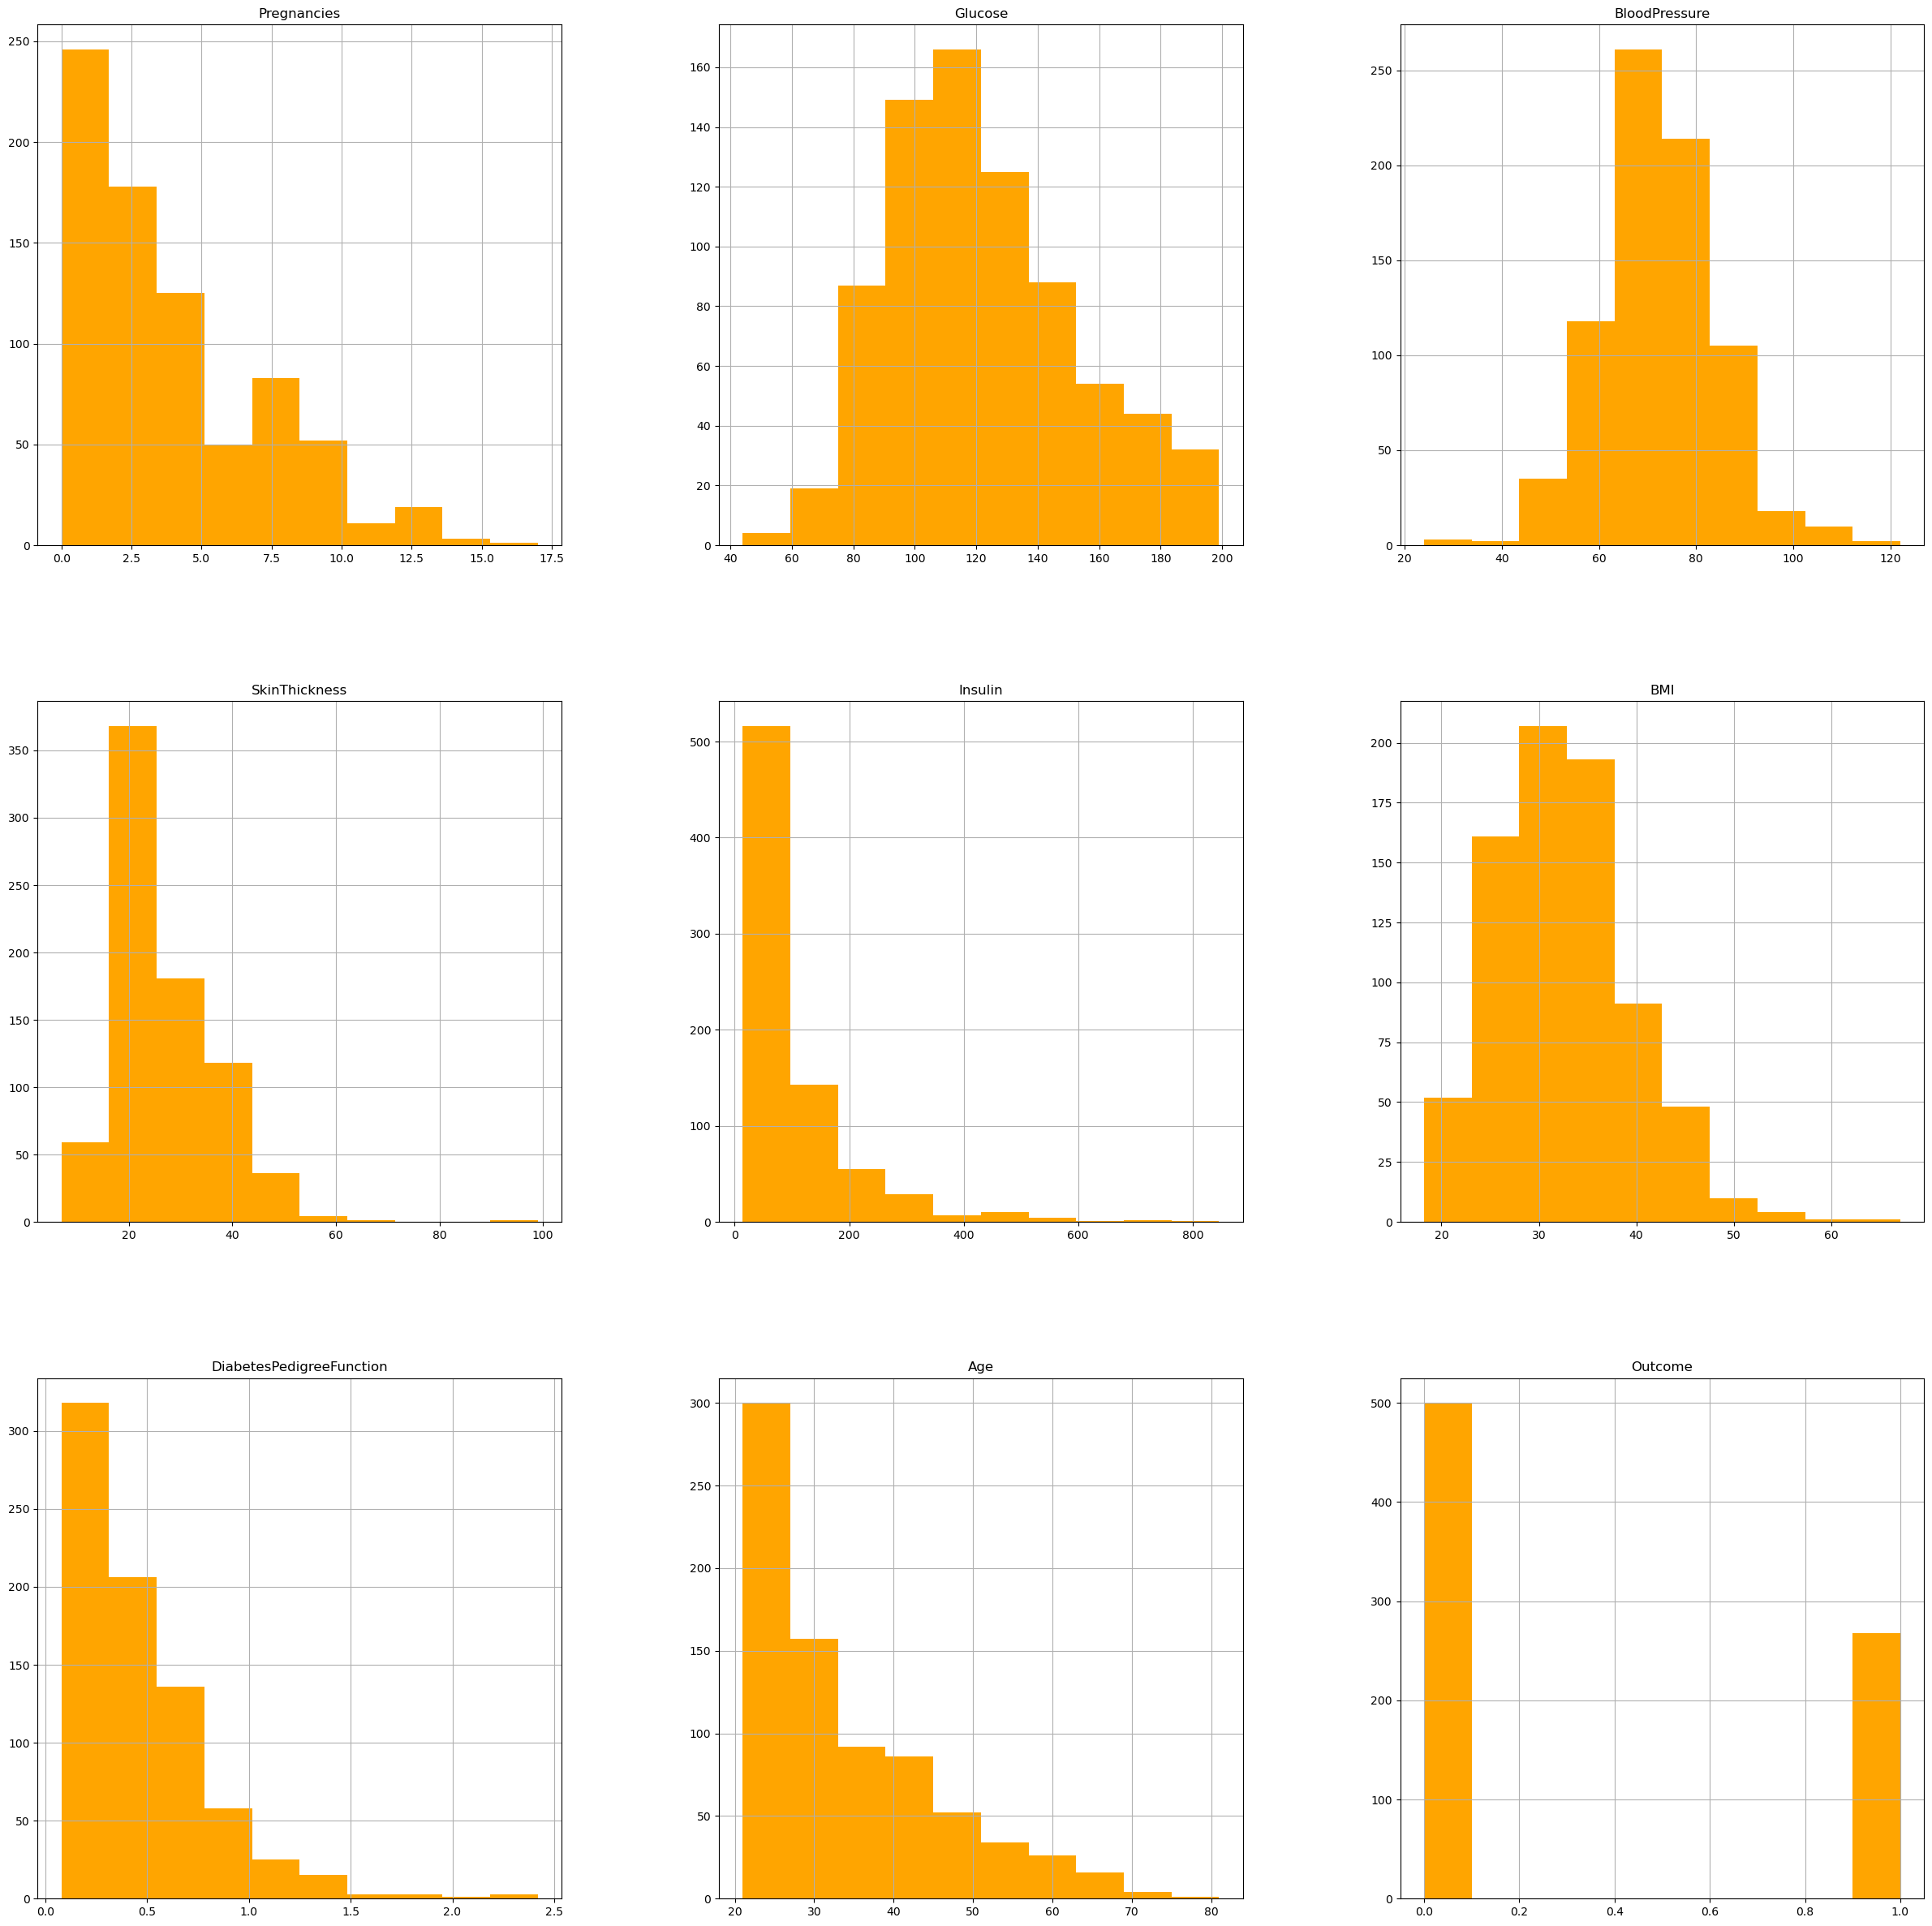

In [10]:
df.hist(figsize = (30,30), color = 'orange')
plt.show()

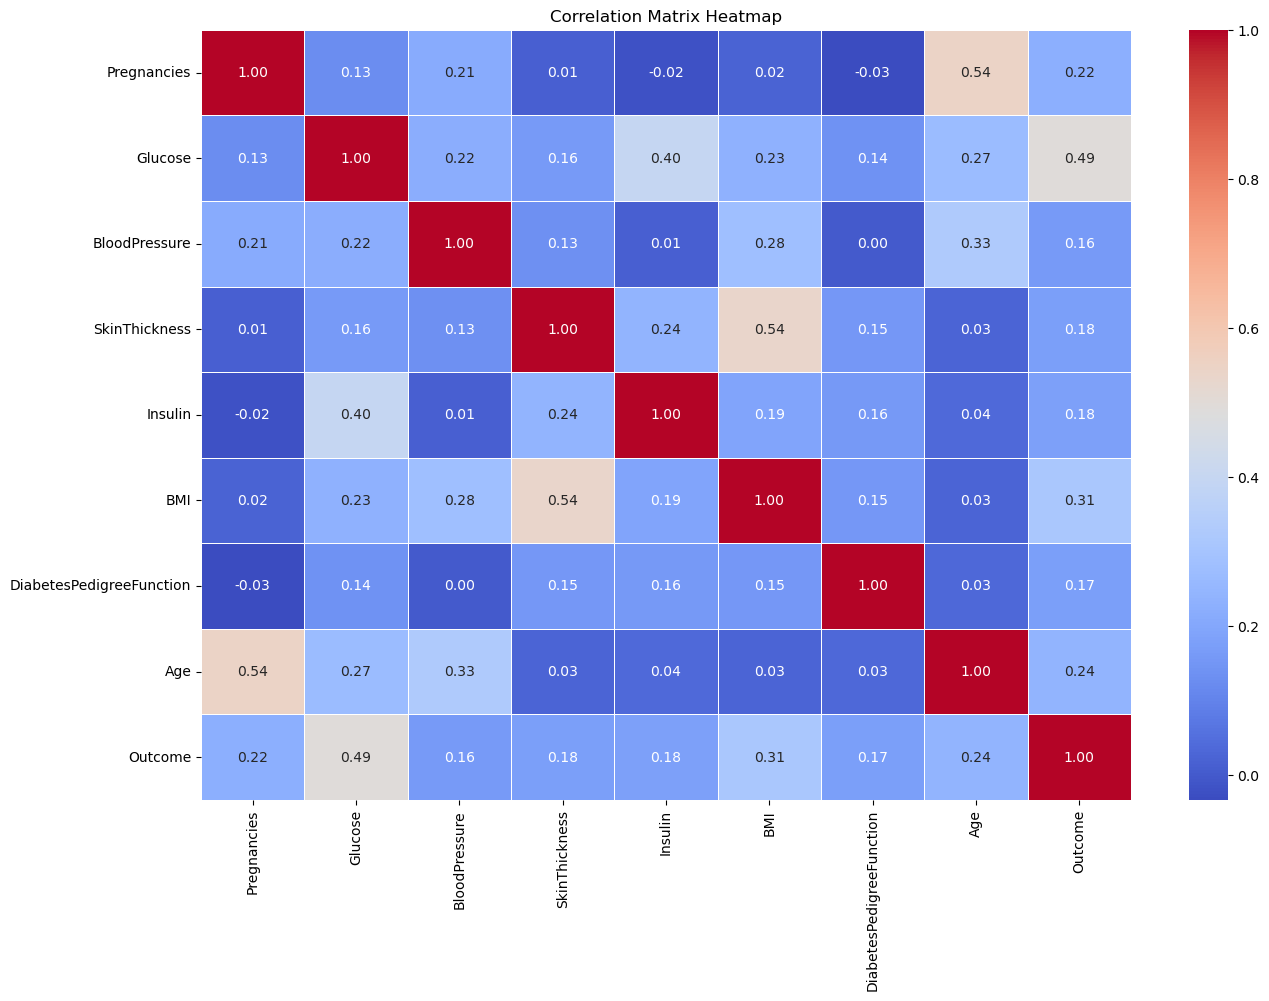

In [11]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap='coolwarm' , linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

There is no multicollinearity present

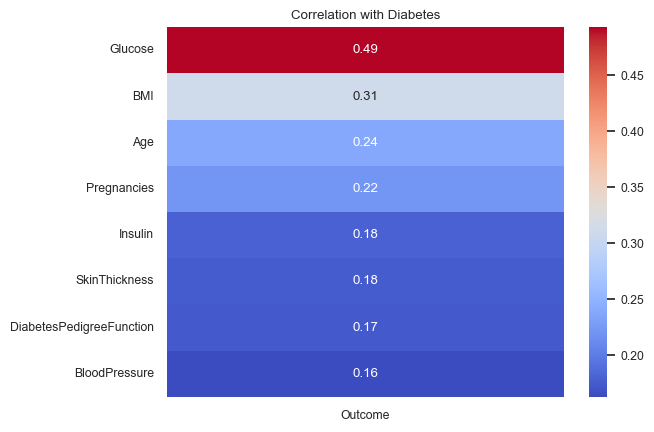

In [12]:
corr=df.corr()
target_corr=corr['Outcome'].drop('Outcome')

target_corr_sorted= target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

With a correlation of 0.49, Glucose is the most strongly correlated feature with the outcome. 

This suggests that higher glucose levels could be a significant indicator of diabetes.

BMI can be also important factor in diabetes.

<AxesSubplot:>

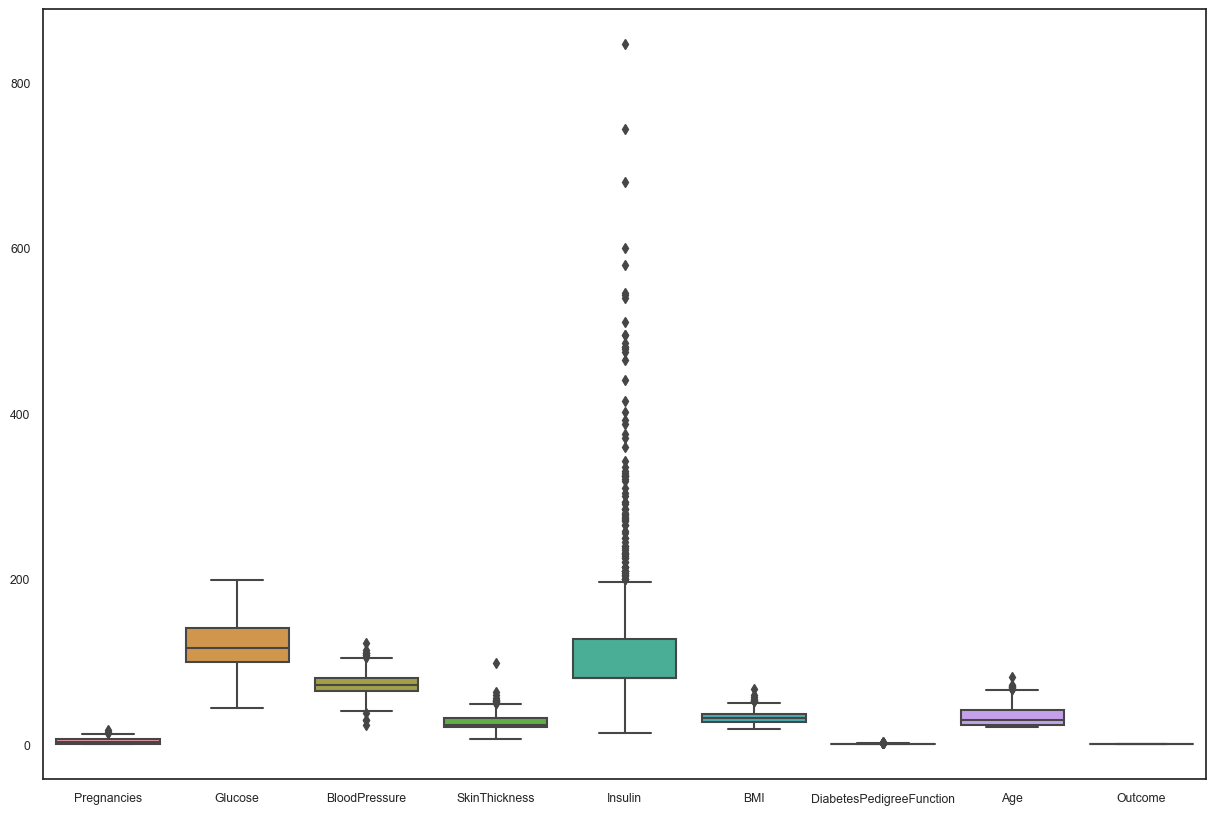

In [13]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df)

There are many outliers in Insulin, which can be handeled using scaling the data.

## Data splitting and Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

In [15]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [16]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31


In [17]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

In [19]:
x_train.shape , x_test.shape

((537, 8), (231, 8))

In [20]:
y_train.shape , y_test.shape

((537,), (231,))

## Feature Standardization

In [21]:
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Predictive model using Logistic Regression

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [24]:
features_value = [np.array(x_test[0])]

In [29]:
features_name = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
df = pd.DataFrame(features_value, columns=features_name)
output = model.predict(df)
output

array([0], dtype=int64)

In [31]:
features_value = [np.array(x_test[1])]
features_name = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
df = pd.DataFrame(features_value, columns=features_name)
output = model.predict(df)
output

array([0], dtype=int64)

In [30]:
features_value = [np.array(x_test[3])]
df = pd.DataFrame(features_value, columns=features_name)
output = model.predict(df)
output

array([1], dtype=int64)

In [32]:
x_test[0]

array([-1.15305975, -0.69856889,  0.29213328, -0.62954654, -0.41643345,
        0.45050612, -0.82406313, -0.63092317])

In [33]:
x_test[1]

array([-0.23437565, -0.53319001, -1.56024479, -0.58245227,  0.41315006,
       -0.22252154, -0.5506465 , -0.79639606])

In [34]:
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Training Accuracy = {train_accuracy}\nTesting  Accuracy = {test_accuracy}")

Training Accuracy = 0.7653631284916201
Testing  Accuracy = 0.8008658008658008


In [35]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lr,x,y,cv=5,scoring="accuracy"))

0.7682794329853152

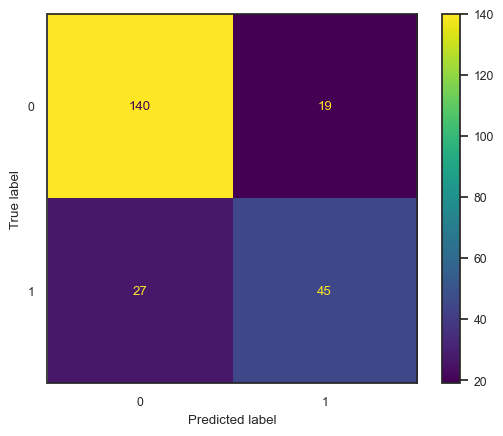

In [36]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, x_test, y_test) 
plt.show()

In [37]:
print(classification_report(y_test, y_test_pred ))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       159
           1       0.70      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.80      0.80      0.80       231



In [38]:
pickle.dump(lr, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))
print(model)

LogisticRegression()


In [27]:
import numpy as np
import pickle
import pandas as pd
from flask import Flask, request, render_template

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST']) 
def predict():
    input_features = [float(x) for x in request.form.values()]
    features_value = [np.array(input_features)]
    
    features_name = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
    
    df = pd.DataFrame(features_value, columns=features_name)
    output = model.predict(df)
    
    print(df,output)
    if output == 0:
        res_val = "No Diabetes"
    else:
        res_val = "Diabetes"

    return render_template('index.html', prediction_text='Patient has {}'.format(res_val))

if __name__ == "__main__":
#     app.debug = True
    app.run(port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)


## MODEL 2

## Hypertuning 

### GridSearchCV


In [1]:
from sklearn.model_selection import GridSearchCV

penalty: This parameter specifies the type of regularization penalty to be applied to the logistic regression algorithm
  
options of penalty are

'l1': L1 regularization, which adds the absolute values of the coefficients to the loss function.
    
'l2': L2 regularization, which adds the squared values of the coefficients to the loss function.
    
'elasticnet': Elastic Net regularization, which is a combination of L1 and L2 regularization.
    
None: No regularization.

C: The C parameter represents the inverse of the regularization strength. It controls the amount of regularization applied to the model. Smaller values of C indicate stronger regularization, while larger values of C indicate weaker regularization. In the given example, np.logspace(-3,3,7) creates a logarithmic scale of values from 0.001 to 1000, which will be used to tune the regularization strength.



solver: This parameter specifies the algorithm used to optimize the logistic regression model. Different solvers use different algorithms for optimization. The possible options for the solver are:

'lbfgs': Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm, suitable for small datasets.
    
'liblinear': Library for Large Linear Classification, suitable for small and medium-sized datasets.
    
'newton-cg': Newton's conjugate gradient algorithm, suitable for multiclass problems.
    
'newton-cholesky': Newton's method with Cholesky decomposition, suitable for multiclass problems.
    
'sag': Stochastic Average Gradient descent, suitable for large-scale problems.
    
'saga': Improved version of stochastic average gradient descent, suitable for large-scale problems.


In [40]:
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-3,3,7),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}


In [43]:
logreg = LogisticRegression()
clf = GridSearchCV(
    logreg,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [44]:
# best parameters
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [45]:
clf.best_score_

0.759643605870021

In [46]:
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [48]:
y_pred_clf = classifier.predict(x_test)

In [50]:
print('This is the confusion matrix for GridSearchCV :\n', confusion_matrix(y_test, y_pred_clf))
print('\n')
print('This is the Accuracy for GridSearchCV :\n', accuracy_score(y_test, y_pred_clf))
print('\n')
print('This is the classification report for GridSearchCV :\n \n' , classification_report(y_test, y_pred_clf) )

This is the confusion matrix for GridSearchCV :
 [[140  19]
 [ 28  44]]


This is the Accuracy for GridSearchCV :
 0.7965367965367965


This is the classification report for GridSearchCV :
 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       159
           1       0.70      0.61      0.65        72

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.79      0.80      0.79       231



Both the model has approx same accuracy, precision, recall and f1-score

we choose model 2.

In [51]:
file_pkl = open('modelForPrediction.pkl','wb')
pickle.dump(classifier, file_pkl)
file_pkl.close()